# Projet : Prédiction des débits dans le réseau d’égouts en fonction des prévisions météorologiques et des précipitations enregistrées 

___


L'objectif de ce projet est Établir le lien entre les débits aux régulateurs en fonction des précipitations 
enregistrées aux 51 stations pluviométriques réparties sur l’île de Montréal et les prévisions météorologiques.


### Sommaire:
___

**[I.Importer le Dataset(les débits et les précipitations) et le diviser en un vecteur y et une matrice X](#section_I)**   
**[II.Entraînement d'un MLP(Perceptron multicouche)](#section_II)**  
  [II.1. Le modéle choisi](#section_II.1)   
  [II.2. Fonction de perte](#section_II.2)  
**[III.Résultat sur toute la base de données de test](#section_III)**  
**[IV. Prediction, Comparaison entre modele observé et prédit](#section_IV)**  
  [IV.1. Méthode 1: Coefficient d'efficacité de Nash–Sutcliffe](#section_IV.1)  
  [IV.2. Méthode 2: L'erreur relative](#section_IV.2)   
**[VI. Références](#section_VI)**  






<a id="section_I"></a>
### I. Importer le Dataset(les débits et les précipitations) et le diviser en un vecteur y et une matrice X
___
la bibliothéque tensorflow implémente des méthodes d’apprentissage automatique basées sur le principe des réseaux de neurones profonds.
keras : encapsule l’accès aux fonctions proposées par plusieurs librairies de machine learning, en particulier Tensorflow.

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

C:\Users\Lotfi\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Lotfi\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Lotfi\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Lotfi\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [2]:
# Perceptron multicouche pour le problème de regression avec mse (erreur quadratique moyenne)
from keras.optimizers import RMSprop, Adam
from keras.models import Sequential
from keras.layers import Dense , Dropout
from tensorflow import keras

Using TensorFlow backend.


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# import BatchNormalization
from keras.layers.normalization  import BatchNormalization

Importer les précipitations de 51 stations et les 39 débits aux régulateurs.

In [4]:
import matplotlib.pyplot as plt
preci = pd.read_excel("../Projet_v2/precipitations_1mois.xlsx")
reg = pd.read_excel("../Projet_v2/debit_un_mois.xlsx")

Partitionner les données entre observation pour apprentissage(90%), et test (10%).

In [5]:
X_train, X_test, y_train, y_test = train_test_split(preci,reg , test_size=0.1,shuffle=False)

In [6]:
# Normaliser les données d'entrainement.
# Initialiser le 'Scaler'
scaler = StandardScaler() 

scaler.fit(X_train) 

StandardScaler(copy=True, with_mean=True, with_std=True)

<a id="section_I"></a>
### II.Entraînement d'un MLP(Perceptron multicouche)
___

<a id="section_II.1"></a>
#### II.1. Le modéle choisi

In [7]:
# Définier le modéle
# instantier le modéle
# La classe Sequential est une structure, initialement vide, qui permet de définir un empilement de couches de neurones
model = Sequential()

# Ce morceau est la couche d'entrée
model.add(Dense(20,activation='sigmoid',input_shape=(51,),kernel_initializer='he_uniform'))
model.add(Dropout(0.3))

# les couches intermédiaires 
model.add(Dense(25, activation='relu',))
model.add(Dropout(0.3))
model.add(Dense(25, activation='sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='relu'))

model.add(Dense(64,  activation='sigmoid'))
model.add(BatchNormalization(epsilon=1e-06, mode=0, momentum=0.9, weights=None))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
 
model.add(Dense(64, activation='sigmoid'))
model.add(BatchNormalization(epsilon=1e-06, mode=0, momentum=0.9, weights=None))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(25, activation='sigmoid'))
model.add(BatchNormalization(epsilon=1e-06, mode=0, momentum=0.9, weights=None))

# Ce morceau est la couche de sortie . 39 car, on a 39 débits dans la sortie
model.add(Dense(39, activation='relu'))
model.summary()

C:\Users\Lotfi\anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `BatchNormalization` call to the Keras 2 API: `BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None)`
C:\Users\Lotfi\anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Update your `BatchNormalization` call to the Keras 2 API: `BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None)`
C:\Users\Lotfi\anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Update your `BatchNormalization` call to the Keras 2 API: `BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None)`


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                1040      
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 25)                525       
_________________________________________________________________
dropout_2 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 25)                650       
_________________________________________________________________
dropout_3 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

<a id="section_II.2"></a>
#### II.2. Fonction de perte

J'ai choisi comme fonction de perte 'erreur quadratique moyenne', aussi j'ai tenté par la fonction 'erreur moyenne absolue'

In [8]:
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile( #loss=tf.keras.losses.MeanSquaredError(),
              loss='mean_absolute_error',
              optimizer=Adam(lr=1e-4),
              metrics=['mse'])

In [9]:
batch_size = 25
epochs = 100

In [10]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    validation_data = (X_test, y_test))


Train on 8036 samples, validate on 893 samples
Epoch 1/100
 - 17s - loss: 0.5246 - mse: 0.8792 - val_loss: 0.4736 - val_mse: 1.2733
Epoch 2/100
 - 6s - loss: 0.4472 - mse: 0.7522 - val_loss: 0.4263 - val_mse: 1.1714
Epoch 3/100
 - 5s - loss: 0.3800 - mse: 0.6445 - val_loss: 0.3602 - val_mse: 1.0461
Epoch 4/100
 - 5s - loss: 0.2997 - mse: 0.5201 - val_loss: 0.2938 - val_mse: 0.9628
Epoch 5/100
 - 5s - loss: 0.2443 - mse: 0.4344 - val_loss: 0.2178 - val_mse: 0.8451
Epoch 6/100
 - 5s - loss: 0.2264 - mse: 0.4029 - val_loss: 0.2215 - val_mse: 0.8596
Epoch 7/100
 - 5s - loss: 0.2133 - mse: 0.3922 - val_loss: 0.1924 - val_mse: 0.8146
Epoch 8/100
 - 6s - loss: 0.2090 - mse: 0.3806 - val_loss: 0.2148 - val_mse: 0.8530
Epoch 9/100
 - 5s - loss: 0.2024 - mse: 0.3762 - val_loss: 0.2156 - val_mse: 0.8558
Epoch 10/100
 - 6s - loss: 0.2008 - mse: 0.3764 - val_loss: 0.2002 - val_mse: 0.8308
Epoch 11/100
 - 6s - loss: 0.1977 - mse: 0.3698 - val_loss: 0.2006 - val_mse: 0.8321
Epoch 12/100
 - 7s - loss

Epoch 95/100
 - 6s - loss: 0.1028 - mse: 0.2705 - val_loss: 0.1665 - val_mse: 0.7988
Epoch 96/100
 - 5s - loss: 0.1031 - mse: 0.2705 - val_loss: 0.1672 - val_mse: 0.7991
Epoch 97/100
 - 5s - loss: 0.1029 - mse: 0.2701 - val_loss: 0.1677 - val_mse: 0.8001
Epoch 98/100
 - 5s - loss: 0.1027 - mse: 0.2694 - val_loss: 0.1632 - val_mse: 0.7949
Epoch 99/100
 - 5s - loss: 0.1028 - mse: 0.2702 - val_loss: 0.1626 - val_mse: 0.7938
Epoch 100/100
 - 4s - loss: 0.1024 - mse: 0.2687 - val_loss: 0.1633 - val_mse: 0.7932


<a id="section_III"></a>
#### III.Résultat sur toute la base de données de test


La figure suivante présente la fonction de perte pour l'ensemble d'entraînement et l'ensemble de test en fonction de nombre d'itération pour les 39 débits. 

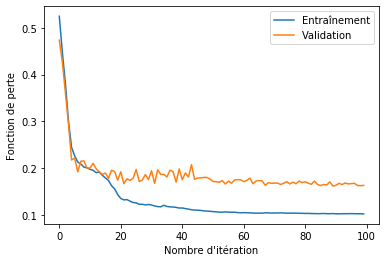

In [11]:
plt.plot(history.history['loss'], label='Entraînement')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend()
plt.xlabel('Nombre d\'itération')
plt.ylabel('Fonction de perte')
plt.savefig('Debits_loss_function.png')

In [12]:
# Taux d'erreur.
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])


Test loss: 0.16332518551728092


<a id="section_IV"></a>
#### IV. Prediction, Comparaison entre modele observé et prédit



In [13]:
prediction= model.predict(X_test)

<a id="section_IV.1"></a>
#### IV.1. Méthode 1: Coefficient d'efficacité de Nash–Sutcliffe

On calcule la valeur moyenne de l'ensemble de test pour chaque débits

In [14]:
mean_list = np.ones(39)
liste = np.ones(39)
for j in range(39) : 
    
    for i in range(len(y_test)) :
        liste[j] = liste[j]  + np.array(y_test)[i][j]
        
    mean_list[j] = liste[j]/len(y_test)
    

On utilise cette formule pour calculer le coefficient d'efficacité de Nash-Sutcliffe .

$$ \text{NSE}  = 1 - \frac{\sum_{n=1}^{m} |Q_m - Q_o|}{\sum_{n=1}^{m} |Q_{mean} - Q_o| }.$$

In [15]:
err1 = np.ones(len(y_test))
err2 = np.ones(len(y_test))
NSE = np.ones(39)

for j in range(39) : 
    err1 = np.ones(len(y_test))
    err2 = np.ones(len(y_test))
    for i in range(len(y_test)) :
             err1[i] = abs(prediction[i][j] - np.array(y_test)[i][j])
             err2[i] = abs(mean_list[j] - np.array(y_test)[i][j])           
    NSE[j] = 1- (sum(err1)/sum(err2))
NSE

array([-0.09824571, -0.17672677,  0.20560234,  0.12084552,  0.12755587,
        0.30714783, -0.01249253,  0.35173044,  0.14290958,  0.38021443,
        0.39614961,  0.12027763,  0.26637631,  0.30383218,  0.35234891,
        0.02519994,  0.0064199 ,  0.29024208,  0.08097208,  0.23905475,
        0.19751807,  0.25022761, -0.02217815,  0.01966847,  0.3305649 ,
       -0.08069754,  0.00205176,  0.37315667, -0.01069939,  0.06402157,
       -0.18635096,  0.2210678 , -0.20009496, -0.85200312,  0.3372323 ,
       -0.98206188,  0.30403364, -0.01125639,  0.09250941])

<a id="section_IV.2"></a>
#### IV.2. Méthode 2: L'erreur relative

On calcule l'erreur relative pour les 39 débits qu'on a.

In [16]:
err1 = np.ones(len(y_test))
er2 = np.ones(len(y_test))
erreur_relative = np.ones(39)

for j in range(39) : 
    err1 = np.ones(len(y_test))
    for i in range(len(y_test)) :
             err1[i] = (abs(prediction[i][j] - np.array(y_test)[i][j])/np.array(y_test)[i][j])*100
             
    erreur_relative[j] = sum(err1)/len(err1)


erreur_relative

array([  6.39742064,  75.85969112,  47.84535507,  16.72628931,
         9.8705075 , 112.66999629,  15.60893661,  15.63067233,
        45.86766002,  31.65603282,  13.10174257,  12.39954518,
        21.3320955 ,  40.13296765,  18.24759808,  17.91276571,
        22.98053656,  26.76100189,  25.04163798,  36.27797192,
        51.84361907,  21.78853694,  12.13429883,  90.15477909,
        20.03973752,  10.22631222,  13.05045247,  26.35859017,
         3.685622  , 170.64656224,  42.90798999,  26.173523  ,
        51.22994561,  66.35847056,  47.61622458,  43.12584508,
        10.31308391,  19.65830736,  12.52930043])

Lorsqu'on change le modéle je fais une comparaison entre le résultat précedent et celui que je obtient.

In [17]:
np.array([ 10.62100539,  26.00354604,  48.65466951,  11.04309238,
         9.72211379, 112.49718163,  15.85989923,  11.38821303,
        41.63937095,  33.79486557,  12.4288189 ,  12.47201533,
        22.19008164,  21.66322445,  17.12598253,  18.96679156,
        23.00839916,  30.83659631,  24.74209849,  25.82763554,
        53.93882632,  21.33641789,  12.63152999,  90.05130906,
        18.94620054,   9.45040917,  12.64592912,  17.10442383,
         3.89170015, 170.34765456,  47.81803171,  31.29042498,
        37.28722315,  79.11280834,  41.57114311,  26.90096023,
        12.99578859,  18.75295021,  12.87922979])-erreur_relative

array([ 4.22358475e+00, -4.98561451e+01,  8.09314439e-01, -5.68319693e+00,
       -1.48393711e-01, -1.72814664e-01,  2.50962621e-01, -4.24245930e+00,
       -4.22828907e+00,  2.13883275e+00, -6.72923673e-01,  7.24701460e-02,
        8.57986138e-01, -1.84697432e+01, -1.12161555e+00,  1.05402585e+00,
        2.78626019e-02,  4.07559442e+00, -2.99539494e-01, -1.04503364e+01,
        2.09520725e+00, -4.52119047e-01,  4.97231163e-01, -1.03470034e-01,
       -1.09353698e+00, -7.75903054e-01, -4.04523355e-01, -9.25416634e+00,
        2.06078150e-01, -2.98907676e-01,  4.91004172e+00,  5.11690198e+00,
       -1.39427225e+01,  1.27543378e+01, -6.04508147e+00, -1.62248849e+01,
        2.68270468e+00, -9.05357152e-01,  3.49929363e-01])

In [18]:
np.array([-0.62829508,  0.28335434,  0.18779448,  0.33782016,  0.1249792 ,
        0.29433453,  0.01231429,  0.4046658 ,  0.17611612,  0.37583263,
        0.40083594,  0.12268659,  0.26883655,  0.37885868,  0.3525721 ,
        0.01069153, -0.02759351,  0.28135892,  0.13618954,  0.34171538,
        0.21369211,  0.28653572, -0.03382895,  0.0136766 ,  0.36633669,
        0.02398438,  0.04835651,  0.40538966, -0.0461383 ,  0.07482297,
       -0.26762832,  0.19507482,  0.16545673, -1.0265248 ,  0.34273375,
        0.00650631,  0.2801617 , -0.00159928,  0.09311947])

array([-0.62829508,  0.28335434,  0.18779448,  0.33782016,  0.1249792 ,
        0.29433453,  0.01231429,  0.4046658 ,  0.17611612,  0.37583263,
        0.40083594,  0.12268659,  0.26883655,  0.37885868,  0.3525721 ,
        0.01069153, -0.02759351,  0.28135892,  0.13618954,  0.34171538,
        0.21369211,  0.28653572, -0.03382895,  0.0136766 ,  0.36633669,
        0.02398438,  0.04835651,  0.40538966, -0.0461383 ,  0.07482297,
       -0.26762832,  0.19507482,  0.16545673, -1.0265248 ,  0.34273375,
        0.00650631,  0.2801617 , -0.00159928,  0.09311947])

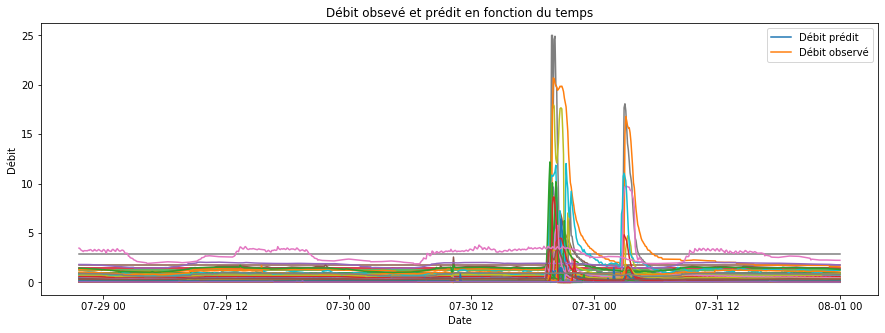

In [20]:

fig, axes = plt.subplots(figsize=(15,5))
#raitement direct d'un fichier Excel

df = pd.read_excel("../Projet_v2/Predit_en_fct_reel.xlsx")

plt.plot(df['date'],prediction)
plt.plot(df['date'], y_test)
plt.xlabel("Date")
plt.ylabel("Débit")
plt.title("Débit obsevé et prédit en fonction du temps")
plt.legend(['Débit prédit', 'Débit observé'])
plt.savefig('Debit_reel_observe_39.png')

<a id="section_V."></a>
#### V. Références
(1) : https://keras.io/examples/vision/visualizing_what_convnets_learn

(2) : https://colab.research.google.com/drive/

(3) : https://www.tutorialspoint.com/keras/index.htm

(4) : https://keras.io/examples/vision/
